In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the iris datasets
dataset = datasets.load_iris()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# add extra column class for easier selection
df['class'] = [dataset.target_names[i] for i in dataset.target]

#printing the features/columns of a dataframe
print("Features: ", df.columns)
# See the size of the dataset
print("No of Samples:", df.shape[0])
print("No of features:", df.shape[1])

# See the class labels
print("Class Labels: ", dataset.target_names)
print("Keys:", df.keys())


Features:  Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')
No of Samples: 150
No of features: 5
Class Labels:  ['setosa' 'versicolor' 'virginica']
Keys: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')


In [2]:
# STEP 4 Select two classes and two features

# Select two classes

df2 = df[df['class'].isin(['setosa', 'versicolor'])]

# Select two features
X = df2[['sepal length (cm)', 'petal length (cm)']].values
y = df2['class'].values

# Encode labels as +1 / -1
y = np.where(y == 'setosa', -1, 1)

print(X[:5], y[:5])


[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]] [-1 -1 -1 -1 -1]


In [4]:
# Define a helper function for the plot
# Helper function for the plot

def plot_decision_line(X, y, weights, epoch):
    plt.figure(figsize=(5,4))
    # Plot the two classes
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', marker='o', label='-1 (class 1)')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='+1 (class 2)')

    # Decision boundary line: w0 + w1*x1 + w2*x2 = 0
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x1_vals = np.linspace(x1_min, x1_max, 100)
    x2_vals = -(weights[0] + weights[1]*x1_vals) / weights[2]
    plt.plot(x1_vals, x2_vals, color='black', linewidth=2)

    plt.title(f'Decision boundary after {epoch} epochs')
    plt.xlabel('Feature 1 ')
    plt.ylabel('Feature 2 ')
    plt.legend(loc='best')
    plt.show()


In [5]:
# Define a dictionary for storing all results so we can compare plots later
# Top-level dictionaris to store all experiments
# data from separable classes training
training_data = {
    'Perceptron': [],
    'Adaline': []
}

# data from unseparable classes training
training_data2 = {
    'Perceptron': [],
    'Adaline': []
}

In [6]:
# Define the Perceptron class

class Perceptron:
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # weights + bias
        self.errors_ = []
        self.w_history_ = []  # save wights for plotting

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.w_history_.append(self.w_.copy())  # save snapshot
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)



In [7]:
#Define Adaline training method

class Adaline:
    def __init__(self, eta=0.001, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        self.w_history_ = []

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            self.w_history_.append(self.w_.copy())  # save snapshot
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X  # identity

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

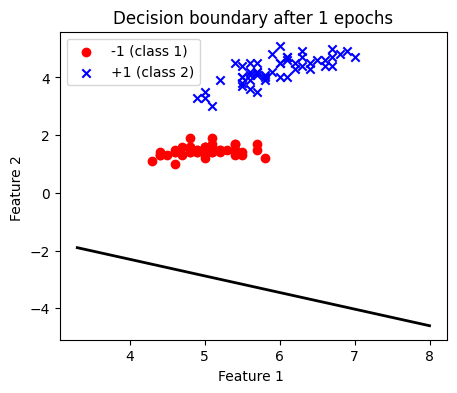

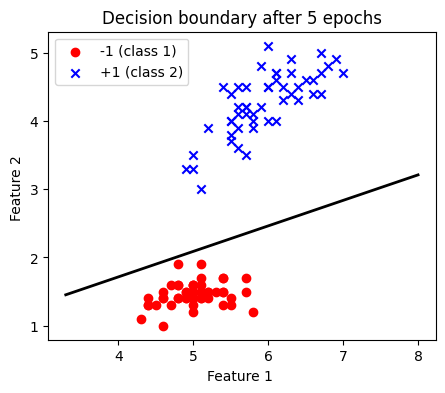

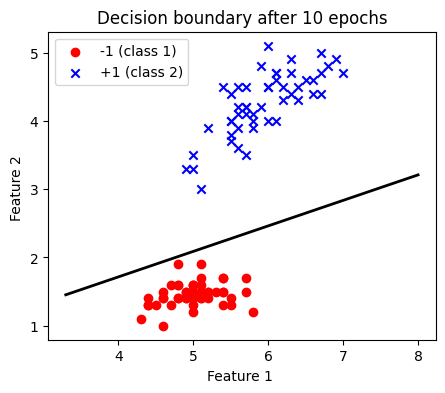

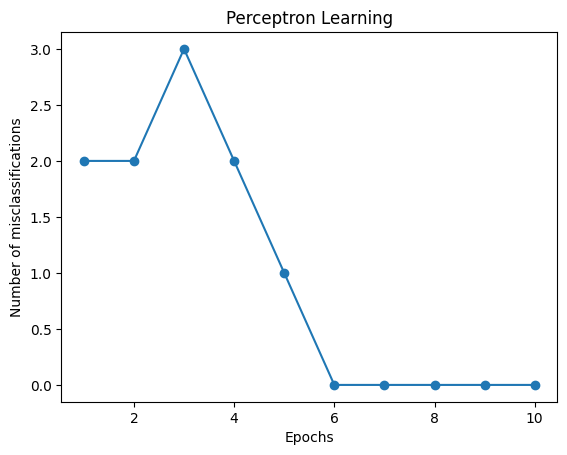

In [9]:
# train using Perceptron class with two features

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

for epoch in [1, 5, 10]:
    plot_decision_line(X, y, ppn.w_history_[epoch-1], epoch)

# Plot error vs epochs
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron Learning')
plt.show()

# Save perceptron data
training_data['Perceptron'].append({
    'title': 'Perceptron - 2 features',
    'n_features': 2,
    'errors': ppn.errors_,        # trining errors
    'weights_history': ppn.w_history_  # for plots
})

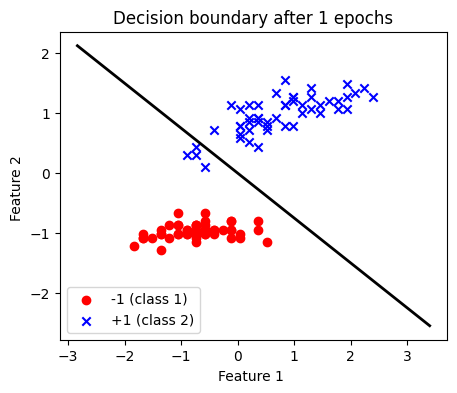

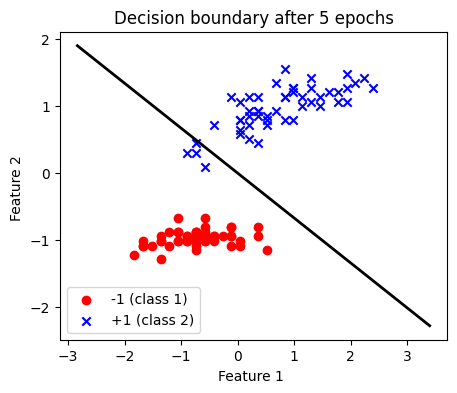

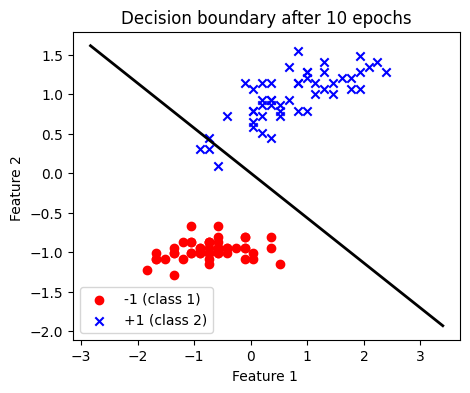

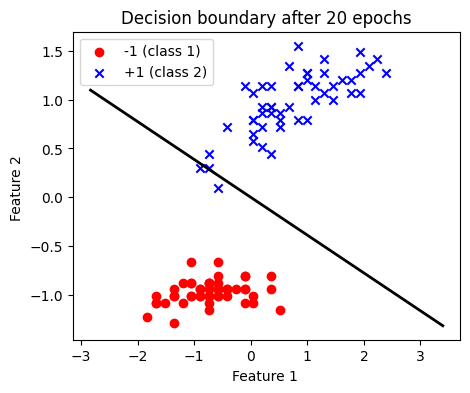

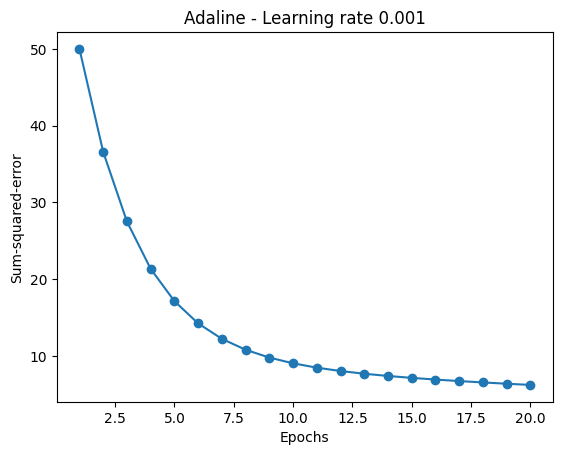

In [10]:
# Train using Adaline 2 features
# First, standardize features
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

ada = Adaline(eta=0.001, n_iter=20)
ada.fit(X_std, y)

# Plot boundaries
for epoch in [1, 5, 10, 20]:
    plot_decision_line(X_std, y, ada.w_history_[epoch-1], epoch)

# Plot error vs epochs
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.001')
plt.show()

# Save training data
training_data['Adaline'].append({
    'title': 'Adaline - 2 features',
    'n_features': 2,
    'errors': ada.cost_,           # sum-squared-error per epoch
    'weights_history': ada.w_history_
})

In [11]:
# STEP 5 Select three features

# Select three features
X = df2[['sepal length (cm)', 'petal length (cm)', 'sepal width (cm)' ]].values
y = df2['class'].values

# Encode labels as +1 / -1
y = np.where(y == 'setosa', -1, 1)

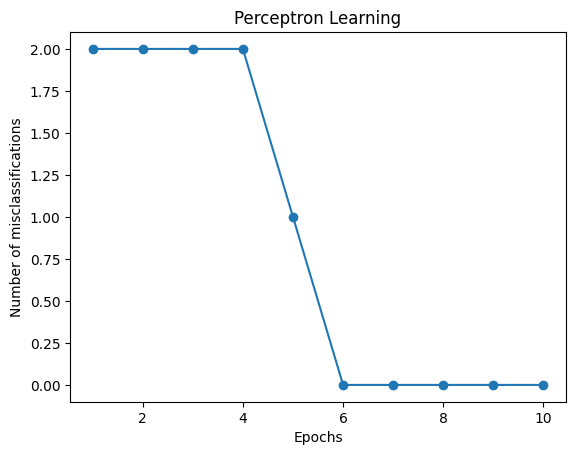

In [12]:
# train using Perceptron class with three features

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Plot error vs epochs
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron Learning')
plt.show()

# Save perceptron training data
training_data['Perceptron'].append({
    'title': 'Perceptron - 3 features',
    'n_features': 3,
    'errors': ppn.errors_,        # training errors
    'weights_history': ppn.w_history_  # for plots
})

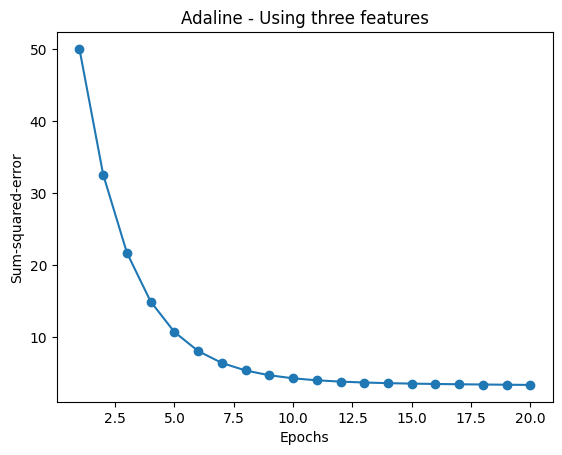

In [13]:
# Train using Adeline with three features
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

ada = Adaline(eta=0.001, n_iter=20)
ada.fit(X_std, y)

# Plot error vs epochs
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Using three features')
plt.show()

# Save training data
training_data['Adaline'].append({
    'title': 'Adaline - 3 features',
    'n_features': 3,
    'errors': ada.cost_,           # sum-squared-error per epoch
    'weights_history': ada.w_history_
})

In [15]:
# STEP 6 Select four features

# Select four features
X = df2[['sepal length (cm)', 'petal length (cm)', 'sepal width (cm)', 'petal width (cm)']].values
y = df2['class'].values

# Encode labels as +1 / -1
y = np.where(y == 'setosa', -1, 1)


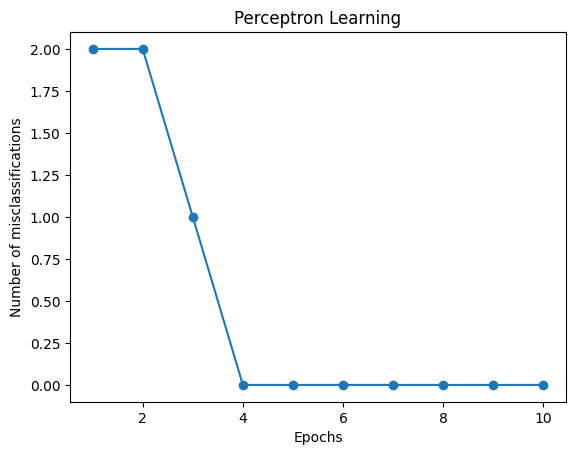

In [16]:
# train using Perceptron class with four features

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Plot error vs epochs
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron Learning')
plt.show()

# Save perceptron training data
training_data['Perceptron'].append({
    'title': 'Perceptron - 4 features',
    'n_features': 4,
    'errors': ppn.errors_,        # training errors
    'weights_history': ppn.w_history_  # for plots
})

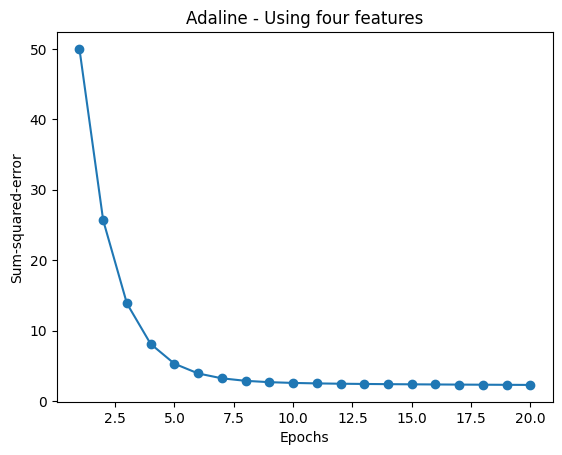

In [17]:
# Train using Adeline with four features
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

ada = Adaline(eta=0.001, n_iter=20)
ada.fit(X_std, y)

# Plot error vs epochs
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Using four features')
plt.show()

# Save training data
training_data['Adaline'].append({
    'title': 'Adaline - 4 features',
    'n_features': 4,
    'errors': ada.cost_,           # sum-squared-error per epoch
    'weights_history': ada.w_history_
})

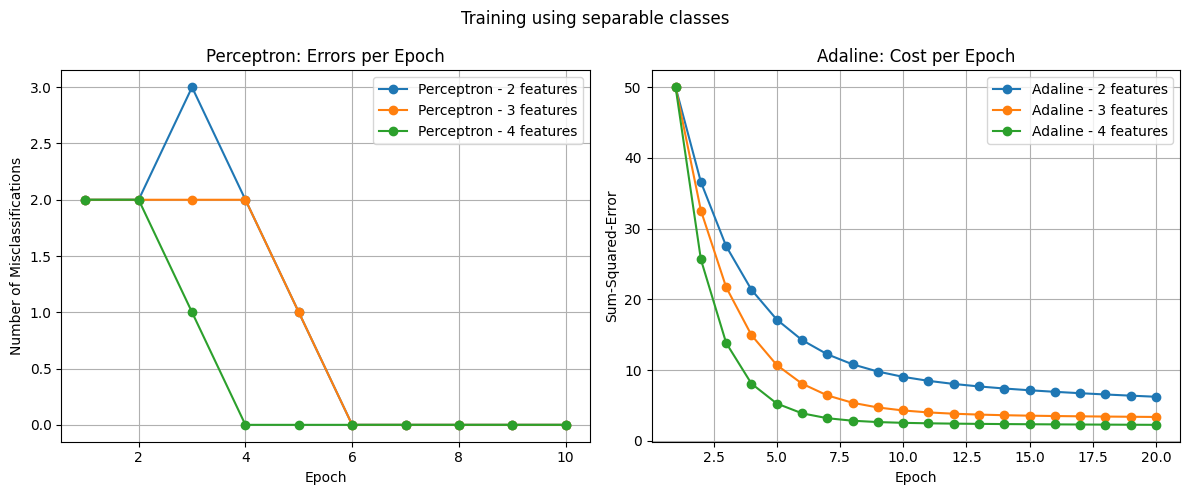

In [18]:
# Create all the plots to compare separable training

plt.figure(figsize=(12, 5))

# Plot Perceptron experiments
plt.subplot(1, 2, 1)
for exp in training_data['Perceptron']:
    plt.plot(range(1, len(exp['errors'])+1), exp['errors'], marker='o', label=exp['title'])
plt.title('Perceptron: Errors per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.legend()
plt.grid(True)

# Plot Adaline experiments
plt.subplot(1, 2, 2)
for exp in training_data['Adaline']:
    plt.plot(range(1, len(exp['errors'])+1), exp['errors'], marker='o', label=exp['title'])
plt.title('Adaline: Cost per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Sum-Squared-Error')
plt.legend()
plt.grid(True)
plt.suptitle("Training using separable classes")
plt.tight_layout()
plt.show()


In [19]:
## STEP 7 - Choose two classes that are unseparable - versicolor, virginica
## Use two features

df2 = df[df['class'].isin(['versicolor', 'virginica'])]

# Select two features
X = df2[['petal length (cm)', 'sepal width (cm)']].values
y = df2['class'].values

# Encode labels as +1 / -1
y = np.where(y == 'virginica', -1, 1)

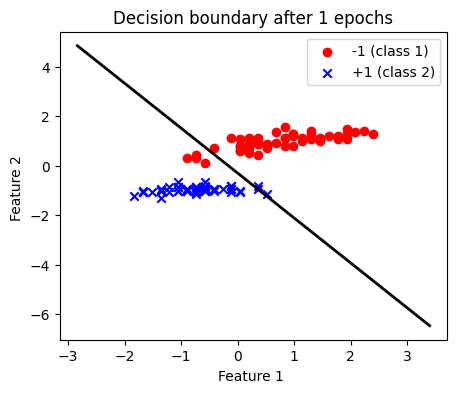

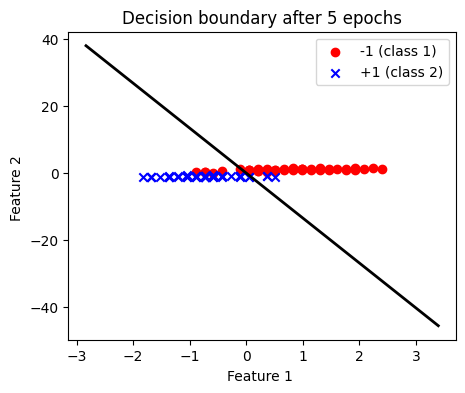

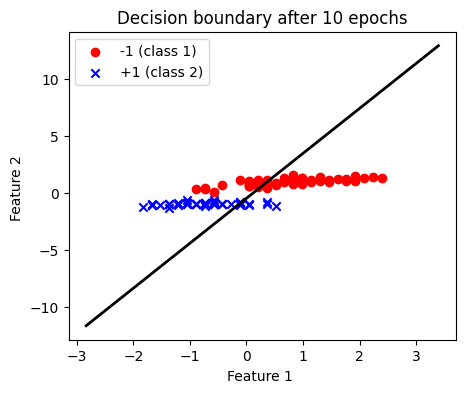

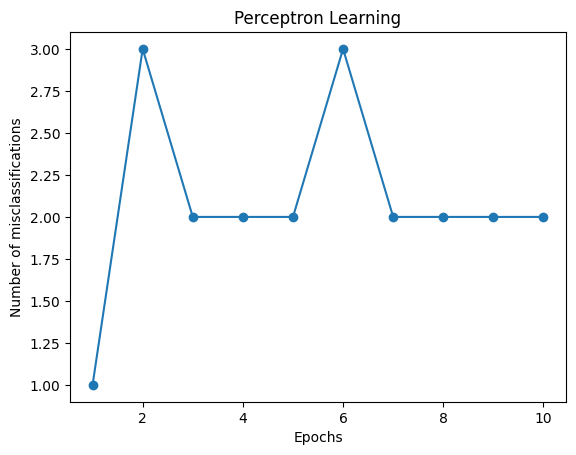

In [20]:
# train using Perceptron class

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

for epoch in [1, 5, 10]:
    plot_decision_line(X_std, y, ppn.w_history_[epoch-1], epoch)

# Plot error vs epochs
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron Learning')
plt.show()

# Save perceptron data
training_data2['Perceptron'].append({
    'title': 'Perceptron - 2 features',
    'n_features': 2,
    'errors': ppn.errors_,        # trining errors
    'weights_history': ppn.w_history_  # for plots
})

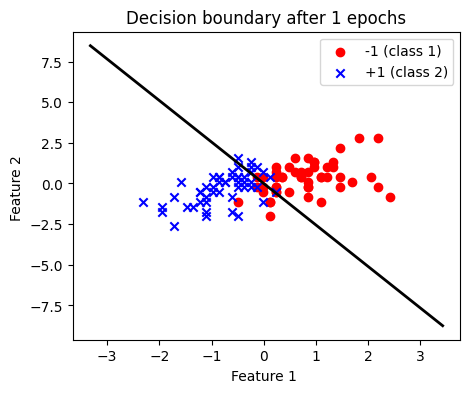

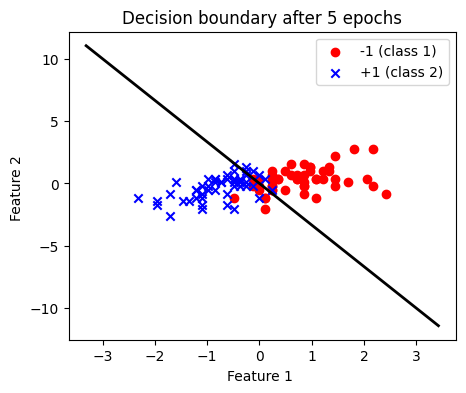

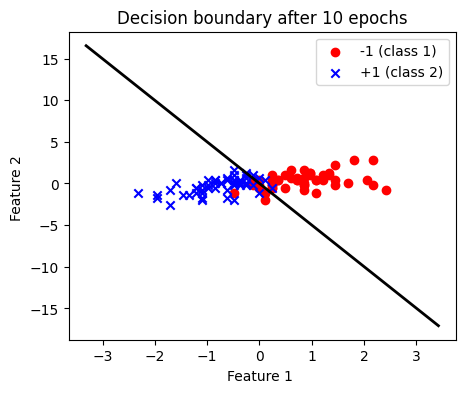

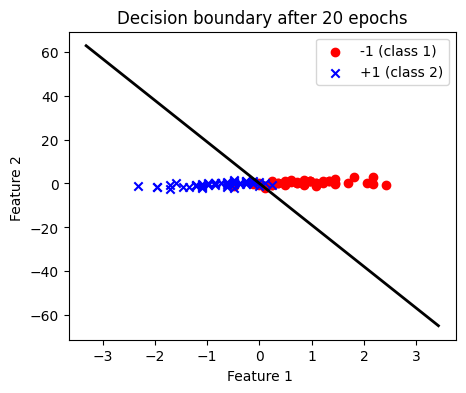

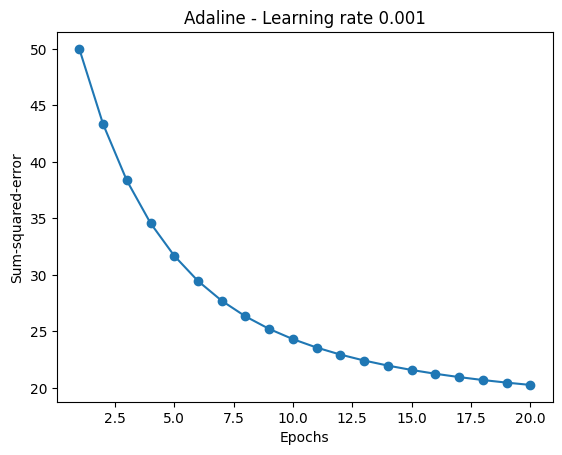

In [21]:
#Train using Adaline

# Train using Adaline 2 features
# First, standardize features
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

ada = Adaline(eta=0.001, n_iter=20)
ada.fit(X_std, y)

# Plot boundaries
for epoch in [1, 5, 10, 20]:
    plot_decision_line(X_std, y, ada.w_history_[epoch-1], epoch)

# Plot error vs epochs
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.001')
plt.show()

# Save training data
training_data2['Adaline'].append({
    'title': 'Adaline - 2 features',
    'n_features': 2,
    'errors': ada.cost_,           # sum-squared-error per epoch
    'weights_history': ada.w_history_
})

In [22]:
## STEP 8 Train using three features

# Select three features
X = df2[['sepal length (cm)', 'petal length (cm)', 'sepal width (cm)' ]].values
y = df2['class'].values
# Encode labels as +1 / -1
y = np.where(y == 'virginica', -1, 1)

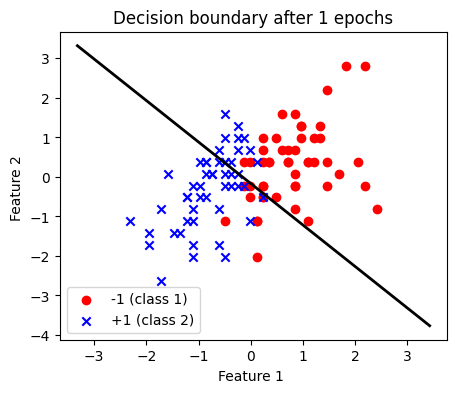

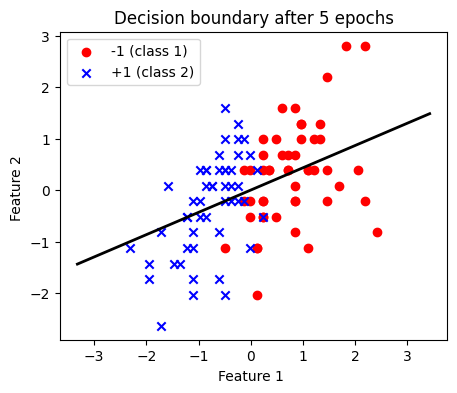

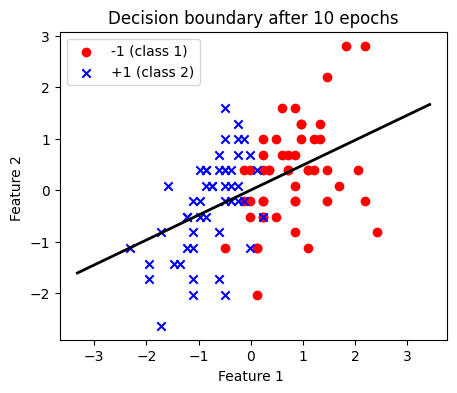

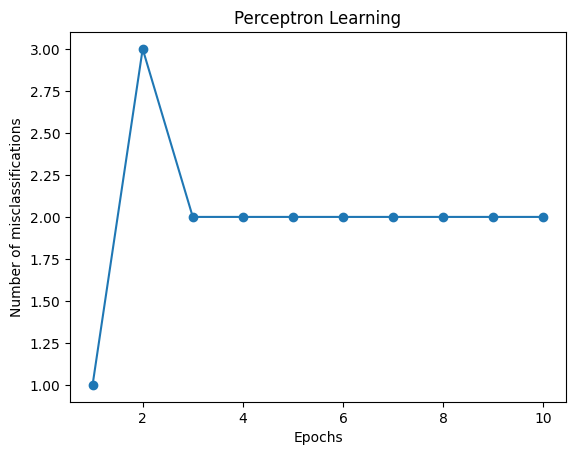

In [23]:
# train using Perceptron class

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

for epoch in [1, 5, 10]:
    plot_decision_line(X_std, y, ppn.w_history_[epoch-1], epoch)

# Plot error vs epochs
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron Learning')
plt.show()

# Save perceptron data
training_data2['Perceptron'].append({
    'title': 'Perceptron - 3 features',
    'n_features': 3,
    'errors': ppn.errors_,        # trining errors
    'weights_history': ppn.w_history_  # for plots
})


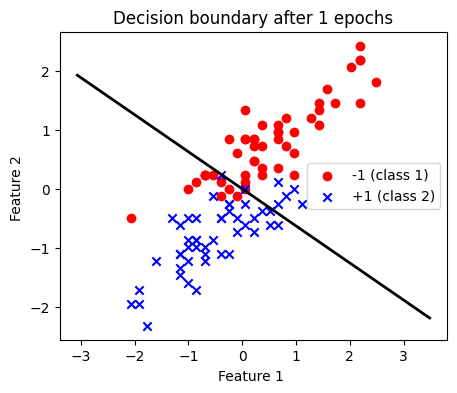

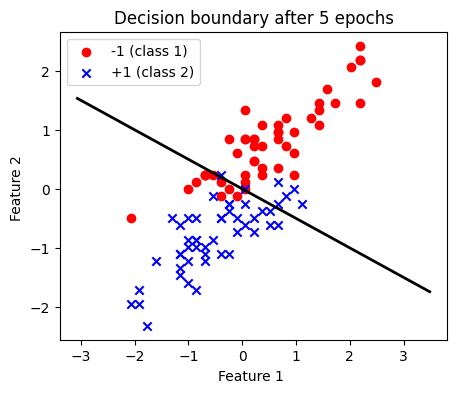

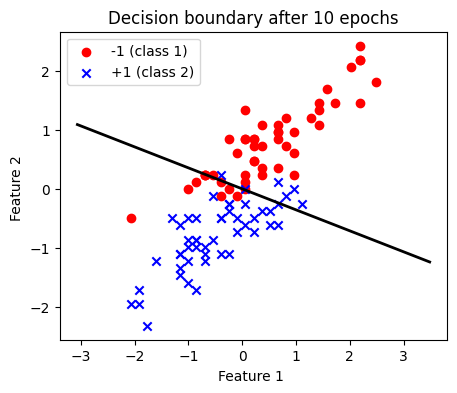

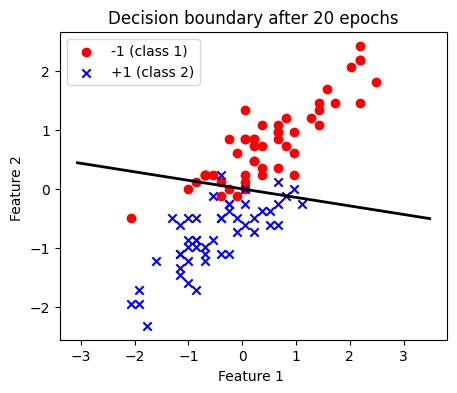

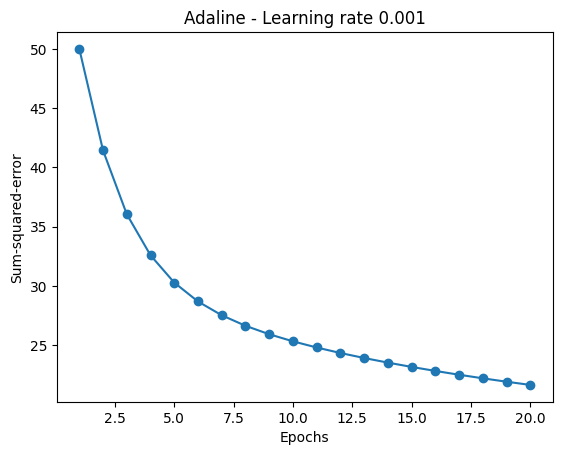

In [24]:
## Train with three features using Adeline
# First, standardize features
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

ada = Adaline(eta=0.001, n_iter=20)
ada.fit(X_std, y)

# Plot boundaries
for epoch in [1, 5, 10, 20]:
    plot_decision_line(X_std, y, ada.w_history_[epoch-1], epoch)

# Plot error vs epochs
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.001')
plt.show()

# Save training data
training_data2['Adaline'].append({
    'title': 'Adaline - 3 features',
    'n_features': 3,
    'errors': ada.cost_,           # sum-squared-error per epoch
    'weights_history': ada.w_history_
})


In [25]:
## STEP 9 Use all four features

# Select four features
X = df2[['sepal length (cm)', 'petal length (cm)', 'sepal width (cm)', 'petal width (cm)']].values
y = df2['class'].values

# Encode labels as +1 / -1
y = np.where(y == 'virginica', -1, 1)


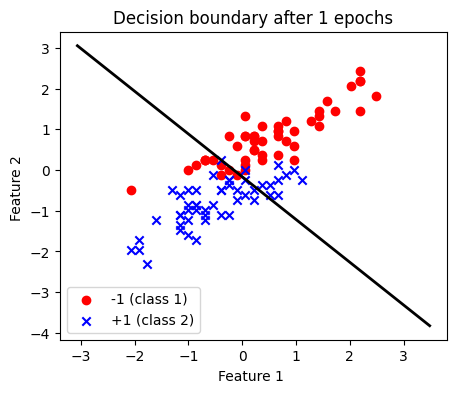

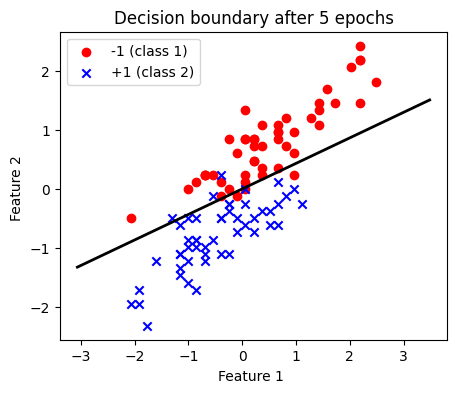

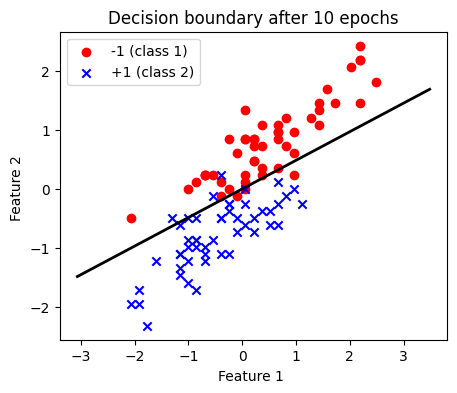

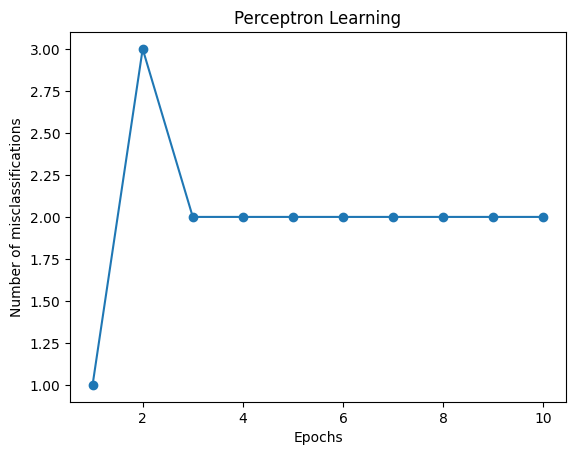

In [26]:
# train using Perceptron class

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

for epoch in [1, 5, 10]:
    plot_decision_line(X_std, y, ppn.w_history_[epoch-1], epoch)

# Plot error vs epochs
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron Learning')
plt.show()

# Save perceptron data
training_data2['Perceptron'].append({
    'title': 'Perceptron - 4 features',
    'n_features': 4,
    'errors': ppn.errors_,        # trining errors
    'weights_history': ppn.w_history_  # for plots
})

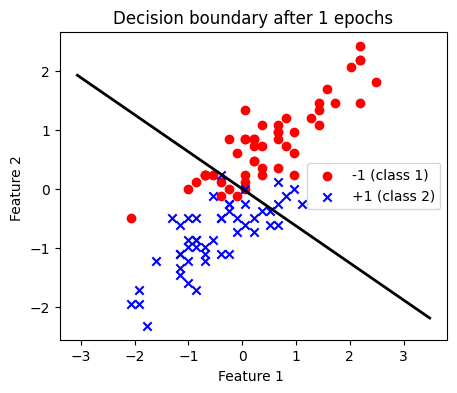

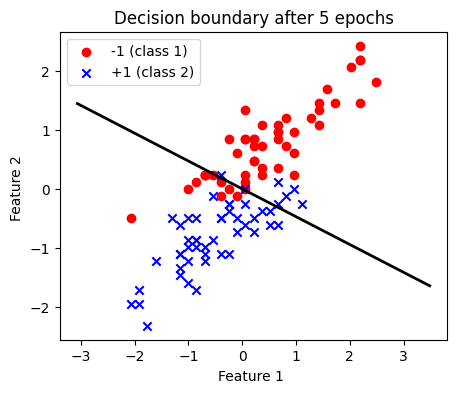

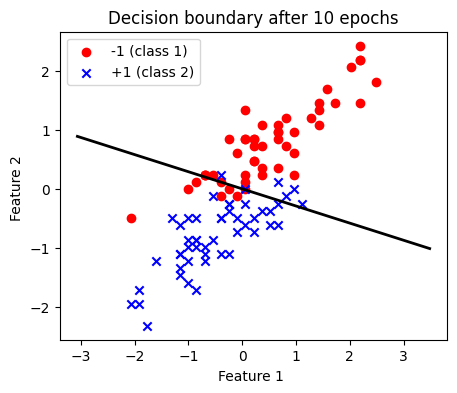

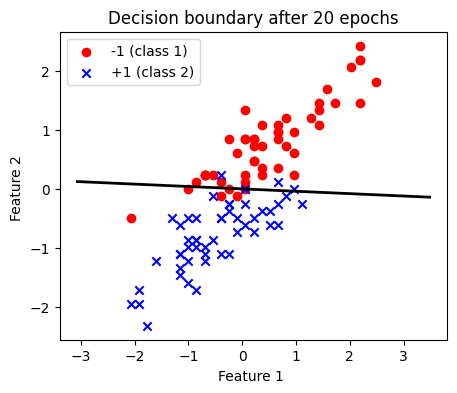

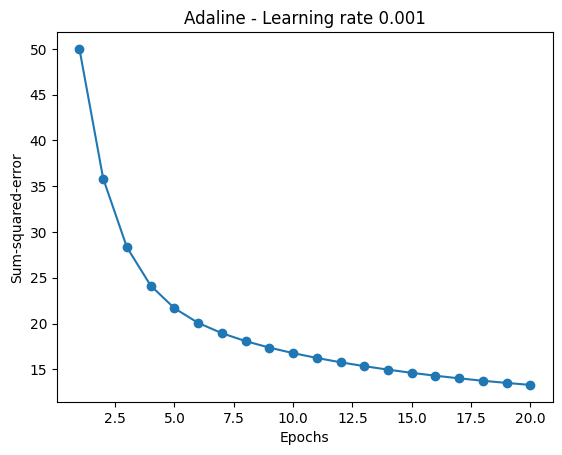

In [27]:
## Train with four features using Adeline
# First, standardize features
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

ada = Adaline(eta=0.001, n_iter=20)
ada.fit(X_std, y)

# Plot boundaries
for epoch in [1, 5, 10, 20]:
    plot_decision_line(X_std, y, ada.w_history_[epoch-1], epoch)

# Plot error vs epochs
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.001')
plt.show()

# Save training data
training_data2['Adaline'].append({
    'title': 'Adaline - 4 features',
    'n_features': 4,
    'errors': ada.cost_,           # sum-squared-error per epoch
    'weights_history': ada.w_history_
})

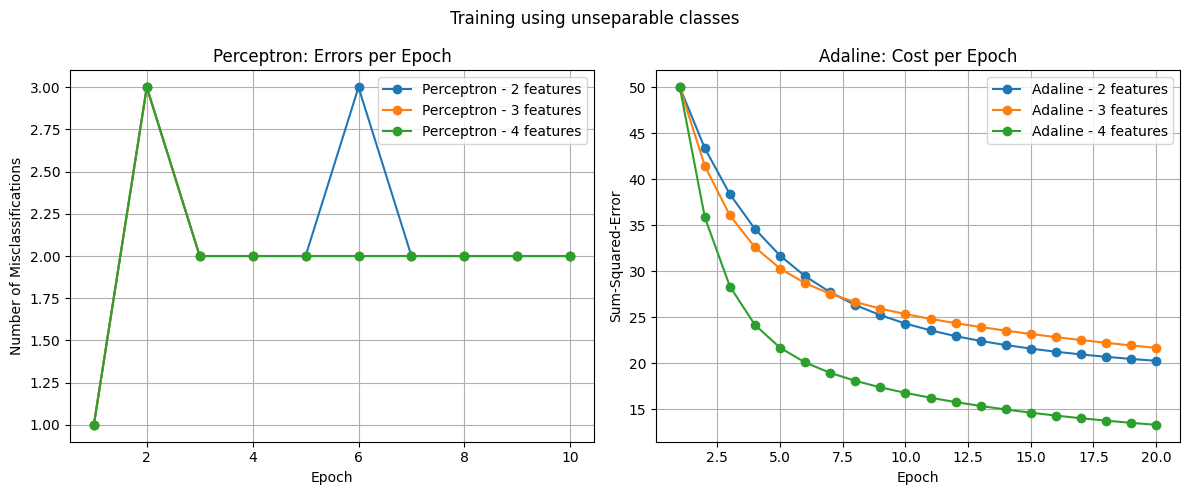

In [29]:
## STEP 10 Compare Results using Perceptron and Adaline.

# Create all the plots to compare unseparable training

plt.figure(figsize=(12, 5))

# Plot Perceptron experiments
plt.subplot(1, 2, 1)
for exp in training_data2['Perceptron']:
    plt.plot(range(1, len(exp['errors'])+1), exp['errors'], marker='o', label=exp['title'])
plt.title('Perceptron: Errors per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.legend()
plt.grid(True)

# Plot Adaline experiments
plt.subplot(1, 2, 2)
for exp in training_data2['Adaline']:
    plt.plot(range(1, len(exp['errors'])+1), exp['errors'], marker='o', label=exp['title'])
plt.title('Adaline: Cost per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Sum-Squared-Error')
plt.legend()
plt.grid(True)
plt.suptitle("Training using unseparable classes")
plt.tight_layout()
plt.show()

Conclusion:

From the plots we can see that when the classes are linearly separable the Perceptron training method is more effective. After about 6 epochs it reaches zero misclassifications. Adaline also converges in this case, but because it uses gradient descent on the sum squared error, it takes more epochs for the error to decrease. For non-linearly separable classes, the Perceptron never reaches zero misclassifications, while Adaline is more effective in reducing the overall error. Adaline performs best when using all four features, because the additional features provide more information and allow the error to decline faster.